### Concept Questions (8)

1. For any $f(x)$ that is a valid probability density function which following condition does **not** hold.
    * $\int{f(x)dx}=1$ over the domain.
    * Any ouput value $f(x)\ge0$. 
    * It represents the likelihoods for a continuous random variable.
    * It must have a finite range.

2. How does the bag-of-words model in NLP work?
    * By vectorizing each word and calculating the distance between characters.
    * By counting the occurrences of each word within the text.
    * By using random sampling to approximate the frequency of words.
    * By considering whole sentences as the objects.

3. If we want check if a word is a palindrome, e.g. 'race car' is same phrase in either direction, what data structure would allow us to check this?
    * Tree
    * Stack
    * Linked List
    * Array

4. The strength of a neural network comes from our ability to
    * Backpropogate the error iteratively to improve it. 
    * Focus our energies on a single node.
    * Scale them easily even with limited compute power.
    * Explain them easily to anyone off the street.

5. Which of these is a strategy we can use to find borders within an image?
    * Pull out a particular pixel value and isolate it. 
    * Threshold where the pixel-to-pixel change in values is high.
    * Turn the saturation up as high as possible.
    * Take the difference of the image and a flipped version of itself.

6. The most crucial first step after data cleaning in a data project is
    * Performing regressions along every variable pair.
    * Telling your boss you need more time. 
    * Exploratory Data Analysis.
    * Build a multi-layer neural network for classification.

7. In performing Prinicipal Component Analysis, what is the primary object we must find?
    * The correlation matrix for every variable pair.
    * The norm distance between each feature vector.
    * The eigenvalues of the covariance matrix.
    * The beta coefficients of linear regression.

8. In Bayesian statistics the \___ is proportional to the product of the likelihood and the \___ . (fill in the blanks) 
    * Total sum of probability, prior.
    * Prior, posterior
    * Mean, variance.
    * Posterior, prior

### True-False Questions (7)

1. In Logistic Regression, one can back-out a probability of the two classes given a new observation to predict on.
2. The DataFrame in pandas is represented as a dictionary of Series objects which are the values in the columns and the keys are the column names.
3. The ```.plot()``` method on a pandas DataFrame does not use the index as a default for the x-axis.
4. A point in k-Nearest Neighbors will always have the same label regardless of the setting of the hyperparameter _k_.
5. pandas ```read_csv()``` method does provide functionality to convert strings to dates, it must be done separately.
6. We can only perform linear regression in $\mathbb{R}^2$.
7. A neural network can only be used to predict binary labels.

### Short-Answer Notebook Question (5)

##### Q1. Generate random groups and run k-means.

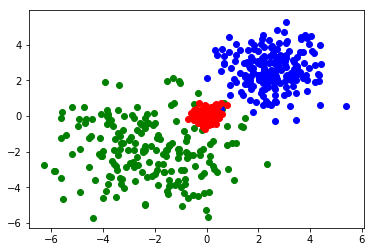

In [4]:
# generate three random groups (~N) in R^2
# TODO: make one ax object; make more global constants

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N_SAMPLES = 200
SEED = 42
group_1 = np.random.normal(-2,1.75, (N_SAMPLES, 2))
group_2 = np.random.normal(2.5,1, (N_SAMPLES, 2))
group_3 = np.random.normal(0,.25, (N_SAMPLES, 2))

# what do our clusters look like?
plt.scatter(group_1[:,0], group_1[:,1], color = 'green')
plt.scatter(group_2[:,0], group_2[:,1], color = 'blue')
_ = plt.scatter(group_3[:,0], group_3[:,1], color = 'red')

In [5]:
# join the groups together
blind_groups = np.concatenate((group_1, group_2, group_3),axis =0)
blind_groups.shape

(600, 2)

In [6]:
# now let's run k-means to see if we can pick them out (w/o the labels)
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(k)
kmeans.fit(blind_groups)
centers = kmeans.cluster_centers_
centers

array([[-2.73850796, -2.18847216],
       [ 2.53223854,  2.64947853],
       [ 0.0072111 , -0.07999266]])

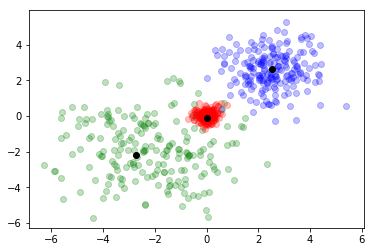

In [57]:
# how did we do?
plt.scatter(group_1[:,0], group_1[:,1], color = 'green', alpha = .25)
plt.scatter(group_2[:,0], group_2[:,1], color = 'blue', alpha = .25)
plt.scatter(group_3[:,0], group_3[:,1], color = 'red', alpha = .25)
_ = plt.scatter(centers[:,0], centers[:,1], color = 'black')

##### Q2. Perform a text analysis project on Romeo & Juliet

In [8]:
import requests
import nltk
from bs4 import BeautifulSoup
import re

In [9]:
# Pull-down the html text from our book
r = requests.get('http://www.gutenberg.org/files/47960/47960-h/47960-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# check that it worked 
html[:100]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml'

In [10]:
soup = BeautifulSoup(html)
text = soup.get_text()

# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
# Tokenizing the text
tokens = tokenizer.tokenize(text)

# convert all words to lowercase
tokens = [s.lower() for s in tokens]

# remove stopwords
sw_dict = nltk.corpus.stopwords.words('english')
words = []
for s in tokens:
    if s not in sw_dict:
        words.append(s)

In [11]:
# NOW THINK OF SOMETHING SIMPLE TO DO


##### Q3. Correlation analysis on something easy to grab.

In [12]:
# where to pull down time series of stock prices?

In [13]:
# convert to returns

In [14]:
# look at how cross-industry correlation happened

##### Q4. Principal Component Analysis on handwritten-digits.

In [15]:
from sklearn.datasets import load_digits
digit_data = load_digits()

6

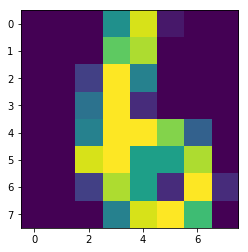

In [16]:
# data organizing
digit_data.keys()
# what does the 16th image look like?
# notice that internally represented as 64-feature vectors that represent 8x8 of picture
_ = plt.imshow(digit_data['data'][16].reshape(8,8))
# what's its label?
digit_data['target'][16]

In [23]:
# let's try to do some PCA on the 6's
six_mask = digit_data['target'] == 6

# how many 6's are in the dataset?
six_mask.sum()

181

array([0.24668555, 0.17211797, 0.14099416])

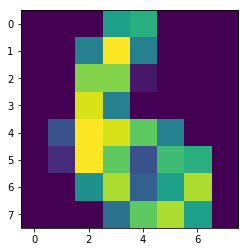

In [47]:
from sklearn.decomposition import PCA

# pick out six's 
X = digit_data['data'][six_mask]
y = digit_data['target'][six_mask]
# check that we have picked out the 6's
plt.imshow(X[5].reshape(8,8))

N_COMPS = 3
pca = PCA(N_COMPS)
pca.fit(X)
pca.explained_variance_ratio_

In [52]:
# now let's see what this does as a dimensionality to a random digit
pos = int(np.random.uniform(0, six_mask.sum()))

# perform dimensionality reduction 

# also we can print out the reduction matrix or something
# check your CU notes

12

##### Q5. Bayesian Analysis.

In [ ]:
# after how many observations can we be sure that a coin is in fact biased?
# if we want a confidence level of >= 0.05
# https://stats.stackexchange.com/questions/244396/bayesian-updating-coin-tossing-example

### Data Set Task (1)
Here we'll use the iris dataset along with Logistic Regression to predict the species of flowers within the *iris* dataset.

In [60]:
# import the iris dataset & libraries
import sklearn.metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
data = load_iris()

In [61]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [62]:
# use logistic regression to identify species
X = data['data']
y = data['target']
label_map = data['target_names']
print(label_map)

['setosa' 'versicolor' 'virginica']


In [63]:
SEED = 42
df_dict = {}

# create the data frame of the measurements
for i, name in enumerate(data['feature_names']):
    df_dict[name] = data['data'][:,i]
df_dict['target'] = y
df = pd.DataFrame(df_dict)
# create a column with the categorical labels for the species
df['species'] = label_map[df['target']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


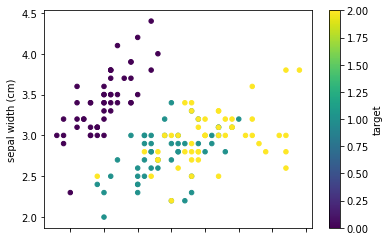

In [64]:
# plot the sepal length against the sepal width; coloring by target
_ = df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c = 'target',
                   colormap='viridis')

In [68]:
# fit Logistic Regression with test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = SEED, test_size = .3)
lr = LogisticRegression()
_ = lr.fit(X_train, y_train)

Because we have three separate classes we must use a loss function that simply penalizes a miscategorization. So, define our loss function as 
$$loss(f(x),y)= 
\begin{cases}
0 \quad if\, f(x)=y \\
1 \quad if\, f(x)\ne y
\end{cases}$$
and then we'll take the average over all the predictions and ground truths in our test set.

In [66]:
# write a function to implement our loss function
def avg_loss(y_actual, y_model):
    loss = 0
    for act, pred in zip(y_actual, y_model):
        if act != pred:
            loss += 1
    return (len(y_actual) ** -1) * loss

# use it to calculate error on dataset
y_pred = lr.predict(X_test)
avg_loss(y_test, y_pred)

0.022222222222222223

In [67]:
# create the confusion matrix
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

## Answers

##### Concept Questions
1. d
2. b
3. b
4. a
5. b
6. c
7. c
8. d

##### True/False
1. True
2. True
3. False
4. False
5. True
6. False
7. False